# Assignment 3 Answers

## Part A

In [3]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 

In [167]:
!pip install ucamcl --upgrade
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment3a')
# paste in whatever section is appropriate for the section of notes / assignment you're working on

Waiting for you to log in ....... done.


In [4]:
#Download the CSV file containing the data using the unix command line
!wget "https://teachingfiles.blob.core.windows.net/scicomp/flood.csv"

--2019-01-21 15:40:53--  https://teachingfiles.blob.core.windows.net/scicomp/flood.csv
Resolving teachingfiles.blob.core.windows.net (teachingfiles.blob.core.windows.net)... 52.174.224.26
Connecting to teachingfiles.blob.core.windows.net (teachingfiles.blob.core.windows.net)|52.174.224.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2605829 (2.5M) [application/vnd.ms-excel]
Saving to: ‘flood.csv’

flood.csv           100%[===================>]   2.48M  2.67MB/s    in 0.9s    

2019-01-21 15:40:54 (2.67 MB/s) - ‘flood.csv’ saved [2605829/2605829]



In [4]:
#Convert the CSV file into a pandas dataframe
camflood=pandas.read_csv('flood.csv')

In [5]:
#Printing out a few arbitrary rows from the dataframe in order to
#investigate its structure and contents
camflood.iloc[np.random.choice(len(camflood),size=10)]

,label,id,lat,lng,town,river,measure_id,qualifier,parameter,period,low,high,valuetype,t,value
9332,Cambridge,2603,51.730432,-2.362218,Cambridge,River Cam,1865,Stage,Water Level,900.0,0.141,1.250,instantaneous,2017-08-21T11:45:00Z,0.188
8749,Cambridge,2603,51.730432,-2.362218,Cambridge,River Cam,1865,Stage,Water Level,900.0,0.141,1.250,instantaneous,2017-08-16T08:15:00Z,0.164
16714,Cam,2514,51.699985,-2.360238,Cam,River Cam,1636,Stage,Water Level,900.0,0.578,0.782,instantaneous,2017-08-15T13:45:00Z,0.798
3448,Dernford,E21737,52.134462,0.141784,Great Shelford,River Cam,1724,Stage,Water Level,900.0,0.127,0.395,instantaneous,2017-08-15T07:45:00Z,0.091
4361,Dernford,E21737,52.134462,0.141784,Great Shelford,River Cam,1724,Stage,Water Level,900.0,0.127,0.395,instantaneous,2017-08-25T05:45:00Z,0.087
8667,Cambridge,2603,51.730432,-2.362218,Cambridge,River Cam,1865,Stage,Water Level,900.0,0.141,1.250,instantaneous,2017-08-19T06:45:00Z,0.170
15437,Cambridge Baits Bite,E60101,52.236542,0.176925,Milton,River Cam,1455,Stage,Water Level,900.0,0.218,0.294,instantaneous,2017-08-29T16:00:00Z,0.253
7668,Bin Brook,E19035,52.197227,0.087527,Cambridge,Bin Brook,1792,Stage,Water Level,900.0,0.057,0.368,instantaneous,2017-09-01T05:30:00Z,0.143
10485,Cambridge,2603,51.730432,-2.362218,Cambridge,River Cam,1865,Stage,Water Level,900.0,0.141,1.250,instantaneous,2017-09-03T00:15:00Z,0.146
14817,Cambridge Baits Bite,E60101,52.236542,0.176925,Milton,River Cam,1455,Stage,Water Level,900.0,0.218,0.294,instantaneous,2017-08-23T08:15:00Z,0.255


### Question 1:

In [6]:
#Removing the entries that pertain to the village of Cam near Bristol 
flood = camflood[camflood['town']!='Cam']
#Identifying the number of entries in this modified dataframe
num_rows = len(flood)

### Question 2:

In [7]:
townriver = flood.groupby(['river','town']).apply(len)
townriver = townriver.unstack(fill_value=0).rename_axis(None,axis=0).rename_axis(None,axis=1)
townriver

,Cambridge,Great Shelford,Milton,Weston Bampfylde
Bin Brook,2665,0,0,0
River Cam,5298,2617,2653,2657


### Question 3:

In [8]:
stations = flood.groupby(['river','town'])['label'].apply(lambda x: len(np.unique(x)))
stations = stations.unstack(fill_value=0).rename_axis(None,axis=0).rename_axis(None,axis=1)
stations

,Cambridge,Great Shelford,Milton,Weston Bampfylde
Bin Brook,1,0,0,0
River Cam,2,1,1,1


### Question 4

In [9]:
'''Normalisation through linear minimum-maximum scaling
can be achieved through application of the following function.'''
def minmaxscaling(value,vmin,vmax):
    normvalue = (value-vmin)/abs(vmax-vmin)
    return normvalue

In [10]:
flood['norm_value'] = minmaxscaling(flood['value'],flood['low'],flood['high'])
flood.iloc[:3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,label,id,lat,lng,town,river,measure_id,qualifier,parameter,period,low,high,valuetype,t,value,norm_value
0,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T07:00:00Z,0.680,0.417476
1,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T00:45:00Z,0.682,0.436893
2,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T04:00:00Z,0.681,0.427184


In [11]:
'''Function that calculates the two tercile values that splits
the vector into 3 apporximately equivalent sized components.'''
def terciles(vec):
    tercs = np.nanpercentile(vec,np.linspace(100/3,200/3,2))
    (terc1,terc2) = (tercs[0],tercs[1])
    return (terc1,terc2)
terciles(flood['norm_value'])

(0.036970243462578906, 0.31511254019292606)

### Question 5

In [12]:
#A function to ascribe a measurement to a particular tercile
def tercileascribe():
    (terc1,terc2) = terciles(flood['norm_value'])
    flood['norm_value_tercile'] = 'med'
    flood['norm_value_tercile'] = np.where((flood['norm_value'] <= terc1),'low',flood['norm_value_tercile'])
    flood['norm_value_tercile'] = np.where((flood['norm_value'] > terc2),'high',flood['norm_value_tercile'])


In [13]:
#Add a new column to the dataframe that includes the qualitative statement on flood level
tercileascribe()
#Remove any invalid datapoints in the dataframe
containsavalidvalue = np.invert(flood['value'].isnull())
flood = flood[containsavalidvalue]

#Create a dataframe that features the quantity corresponding to both measuring station and qualitative statement
levelframe = flood.groupby(['label','norm_value_tercile']).apply(len)
levelframe = pandas.DataFrame(levelframe.reset_index())
levelframe.columns = ['label','norm_value_tercile','n']

#Create a dataframe that features the total number of measurements at each station
levelframe2 = flood.groupby(['label']).apply(len)
levelframe2 = levelframe2.reset_index(name='ntot')

#Combine the two dataframes to feature an 'n' and 'ntot' column
combframe = levelframe.merge(levelframe2, on = 'label')
combframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

,label,norm_value_tercile,n,ntot
0,Bin Brook,high,993,2665
1,Bin Brook,low,19,2665
2,Bin Brook,med,1653,2665
3,Cambridge,low,2132,2645
4,Cambridge,med,513,2645
5,Cambridge Baits Bite,high,2285,2653
6,Cambridge Baits Bite,low,4,2653
7,Cambridge Baits Bite,med,364,2653
8,Cambridge Jesus Lock,high,1906,2651
9,Cambridge Jesus Lock,low,14,2651


### Question 6

In [14]:
#Adding a percentage occurence column of qualitative observation made
#at each measuring station to the dataframe
percentquali = combframe.groupby(['label','norm_value_tercile']).apply(lambda df: np.mean(df['n']/df['ntot']))
# taking the mean leads to all the NaN entries associated with a measuring station being removed and the
#superflous entries of NaN values for the norm_value_tercile values of other stations being eliminated to
#provide a more succint and comprehensible dataframe

#Filling remaning NAN values for measuring stations that do not exhibit a particular qualitative statement to 0
#and converting into a presentable dataframe
percentquali = percentquali.unstack(fill_value=0).reset_index()

### Question 7

In [15]:
#creating a new dataframe for which the high and low values are positioned adjacent to measuring station
highlow = flood[['label','high','low']]
#producing only one entry per measuring station
highlow = highlow.drop_duplicates().reset_index()
#removing a superflous column
del highlow['index']
highlow

,label,high,low
0,Cambridge Jesus Lock,0.740,0.637
1,Dernford,0.395,0.127
2,Bin Brook,0.368,0.057
3,Cambridge,1.250,0.141
4,Weston Bampfylde,0.600,0.026
5,Cambridge Baits Bite,0.294,0.218


In [16]:
'''The desired indexed array is attainable through employment of the
pandas.melt function which converts the label columns into the sole
identifier variable with high/low being measured variables along the row 
axis. The resulting value is then placed adjacent in row next to the high/low
measured variables.'''
highlow2 = pandas.melt(highlow, id_vars=['label'], var_name = 'ref', value_name = 'prop')
#np.mean removes a superflous count column present in the indexed array
highlow2 = highlow2.groupby(['label','ref']).apply(lambda df: np.mean(df['prop']))
highlow2

label                 ref 
Bin Brook             high    0.368
                      low     0.057
Cambridge             high    1.250
                      low     0.141
Cambridge Baits Bite  high    0.294
                      low     0.218
Cambridge Jesus Lock  high    0.740
                      low     0.637
Dernford              high    0.395
                      low     0.127
Weston Bampfylde      high    0.600
                      low     0.026
dtype: float64

## Part B

## Question 8

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


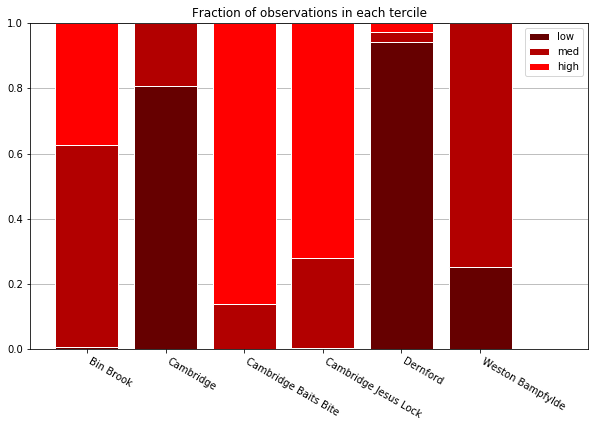

In [17]:
'''Creating a stacked percentage bar graph from the percentquali
dataframe that specifies proportion of tercile assignment per
measuring station.'''
#create a plot of the following dimensions
f,ax = plt.subplots(1,figsize=(10,6))
bar_width = 0.8
#acquire the desired values to be plotted in list form
barquantity = np.arange(len(percentquali)).tolist()
names = percentquali['label'].tolist()
lightgbars = percentquali['high'].tolist()
medgbars = percentquali['med'].tolist()
darkgbars = percentquali['low'].tolist()
combbottombars = (percentquali['med']+percentquali['low']).tolist()

#plot horiztonal axes on the graph and set these to be in the background
#i.e. not to be superimposed onto the plot but rather be recessed into it
plt.axes().grid(b=True,axis='y')
plt.axes().set_axisbelow(True)

#plot the bars in a stacked formation
plt.bar(names, darkgbars, color='#660000',edgecolor='white', width=bar_width)
plt.bar(names, medgbars, bottom=darkgbars, color='#b20000',edgecolor='white', width=bar_width)
plt.bar(names, lightgbars,bottom = combbottombars, color='#ff0000',edgecolor='white', width=bar_width)

#generate an additional null bar for legend space
plt.bar(6,0,color='#000000',edgecolor='white', width=0.1)

plt.title('Fraction of observations in each tercile')

#add a slight rotatoin and shift the position of the labels along the x axis
locs, labels = plt.xticks()
plt.setp(labels, rotation=-30,  ha='left')

#plot a legend in the upper right corner
plt.legend(['low','med','high'],loc=1)
f.show()

### Question 9

In [18]:
#Standardises datetimes as Unix timestamps
import datetime, pytz
def as_datetime(s): return datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC)
#Creates a new column in the original dataframe containing
#these Unix timestaps through applying the function to the
#unstandardised t column
flood['datetime'] = np.vectorize(as_datetime)(flood['t'])

flood.iloc[:3]

,label,id,lat,lng,town,river,measure_id,qualifier,parameter,period,low,high,valuetype,t,value,norm_value,norm_value_tercile,datetime
0,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T07:00:00Z,0.680,0.417476,high,2017-08-07 07:00:00+00:00
1,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T00:45:00Z,0.682,0.436893,high,2017-08-07 00:45:00+00:00
2,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T04:00:00Z,0.681,0.427184,high,2017-08-07 04:00:00+00:00


In [19]:
#Have the terciles of the data accessible
(terc1,terc2) = terciles(flood['norm_value'])
#Create a new dataframe for the purposes of the graph which is 
#a copy o that containing the high/low thresholds and the 
#label of th measuring station
graphdf= highlow
#Create vectorised versions of the tercile for the purposes of 
#calculation
terc1 = np.full(len(graphdf),fill_value=terc1)
terc2 = np.full(len(graphdf),fill_value=terc2)
#Add new columns to the dataframe for the corresponding 
#inter tercile range values
graphdf['itr1'] = graphdf['low']+(terc1*(graphdf['high']-graphdf['low']))
graphdf['itr2'] = graphdf['low']+(terc2*(graphdf['high']-graphdf['low']))
graphdf.sort_values(by=['label'],inplace=True)
graphdf = graphdf.reset_index()

In [20]:
#Form a new dataframe that takes the required value pairings of
#datetime and value that are to be plotted in the graph
tvl = flood[['label','datetime','value']]
tvl.iloc[:3]

,label,datetime,value
0,Cambridge Jesus Lock,2017-08-07 07:00:00+00:00,0.680
1,Cambridge Jesus Lock,2017-08-07 00:45:00+00:00,0.682
2,Cambridge Jesus Lock,2017-08-07 04:00:00+00:00,0.681


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


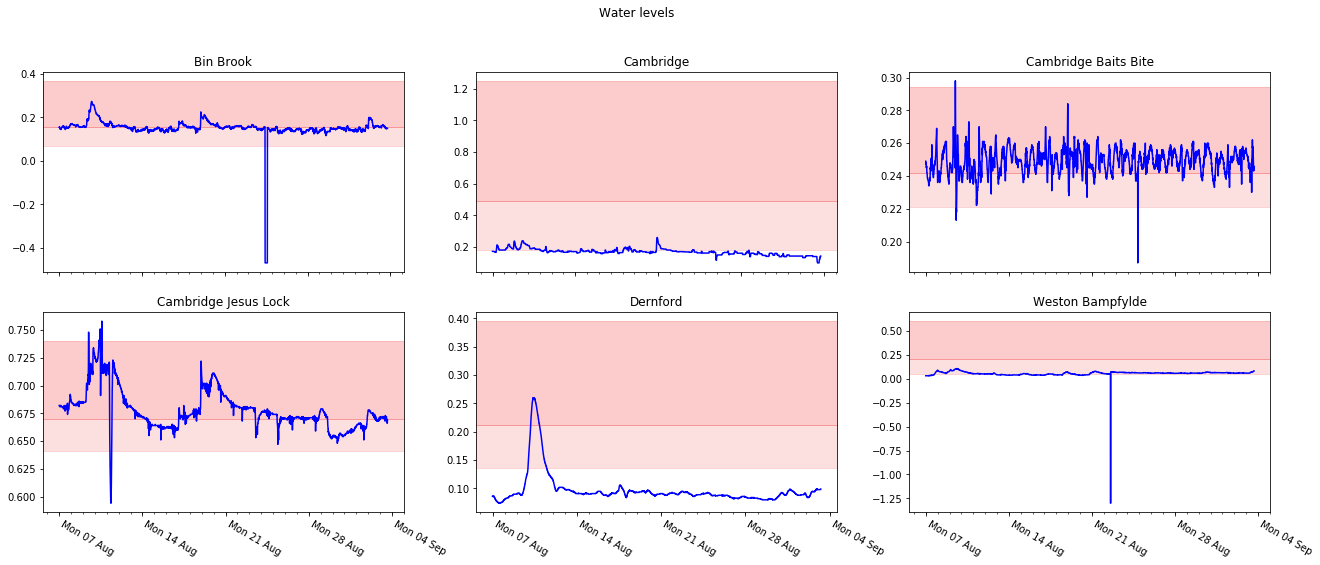

In [36]:
#Create a new plot of the following dimensions
f = plt.figure(figsize=(22,9))

#For loop in order to generate a subplot for each measuring station
for i in range(graphdf['label'].size):
    #Produce a plot of 2 rows and 3 columns, altering the subplot considered on each iteration
    ax = f.add_subplot(2,3,i+1)
    #name of the measuring stations
    measurename = graphdf['label'][i]
    
    #create a new dataframe consisting of the entries that pertain to the currently investigated dataframe
    desiredentries = tvl[np.where(tvl['label']==measurename,True, False)]
    #sort the entries in terms of time which is necessary for an appropriate temporal progression to the
    #time plitting
    desiredentries.sort_values(by=['datetime'],inplace=True)
    #extract the value pairings for plotting, these being values and the corresponding times
    values = desiredentries['value'].tolist()
    times = desiredentries['datetime'].values
    
    #plot the line graph accordingly
    plt.plot(times,values,animated=True,aa=True,color='blue')
     
    plt.title(measurename)
    #plot the shaded regions
    plt.axhspan(ymin=graphdf['itr1'][i], ymax=graphdf['itr2'][i], alpha=0.2, color='#f36765')
    plt.axhspan(ymin=graphdf['itr2'][i], ymax=graphdf['high'][i], alpha=0.2, color='#f20000')
    #convert the x axis labels into a convenient to interpret date format
    ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO, tz=pytz.UTC))
    ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator(tz=pytz.UTC))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%a %d %b'))
    
    
f.suptitle('Water levels')
f.autofmt_xdate(bottom=0.2, rotation=-30, ha='left')